In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm 
from sklearn.impute import KNNImputer

In [435]:
df = pd.read_csv("merged.csv", sep=",", header=None, engine='python') 

In [436]:
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df.head(10)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN
6,5.0,2014,Robert Herron,Wyoming,WR,69.1,193,9.8,30.5,NaN,4.48,18,35.5,124,4.27,6.84,NaN,Wyoming,6,185,TAM,HerrRo00,No,WR,WR,0,22,2014,0,0,0,0,0,8,NaN,NaN,NaN,NaN,NaN,1,0,0,6,58,1,1,NaN,NaN
7,6.0,2001,Patrick Chukwurah,Wyoming,LB,73.6,238,8.5,31.5,NaN,4.75,24,40,119,4.21,7.34,11.78,Wyoming,5,157,MIN,ChukPa20,No,LB,LB,5,22,2007,0,0,0,8,3,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,9
8,7.0,1991,Mitch Donahue,Wyoming,LB,74.3,254,10.0,32.5,NaN,4.93,24,33.5,111,4.32,NaN,NaN,NaN,4,95,SFO,DonaMi20,No,LB,LB,2,23,1994,0,0,0,2,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
9,8.0,2014,Marqueston Huff,Wyoming,FS,71.1,196,9.0,31.4,NaN,4.49,15,35.5,116,4.19,7.26,NaN,Wyoming,4,122,TEN,HuffMa00,No,DB,DB,3,22,2016,0,0,0,3,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1
10,9.0,2015,Mark Nzeocha,Wyoming,LB,74.4,232,10.0,33.0,NaN,4.56,24,NaN,NaN,NaN,NaN,NaN,Wyoming,7,236,DAL,NzeoMa00,No,OLB,LB,0,25,2016,0,0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
df.isnull().sum()

0
NaN                    0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [438]:
df['Pick'] = df.Pick.fillna(260)

In [439]:
#df['Round'] = df.Round.replace(np.nan, 'Undrafted', regex=True)
#df['Round'] = df.Round.fillna(8)

In [440]:
df['Team'] = df.Team.replace(np.nan, 'Free Agent', regex=True)

In [441]:
df.isnull().sum()

0
NaN                    0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [442]:
df.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [443]:
#df = df.dropna(axis=1)
#df3.head(5)

In [444]:
# Cleaning Check
#df.isnull().sum()

In [445]:
df.dtypes

0
NaN                 float64
Year                 object
Name                 object
College_x            object
POS_x                object
Height               object
Weight               object
HandSize             object
ArmLength            object
Wonderlic            object
Forty                object
BenchPress           object
VerticalJump         object
BroadJump            object
Shuttle              object
Cone                 object
60YdShuttle          object
College_y            object
Round                object
Pick                 object
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                   object
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [446]:
df["Forty"] = df.Forty.astype(float)
df["VerticalJump"] = df.VerticalJump.astype(float)
df["BenchPress"] = df.BenchPress.astype(float)
df["BroadJump"] = df.BroadJump.astype(float)
df["Cone"] = df.Cone.astype(float)
df["Shuttle"] = df.Shuttle.astype(float)
df["Round"] = df.Round.astype(float)
df["Pick"] = df.Pick.astype(float)
df["Year"] = df.Year.astype(int)
df["Height"] = df.Height.astype(float)
df["Weight"] = df.Weight.astype(int)
df["AV"] = df.AV.astype(float)

In [447]:
df.dtypes

0
NaN                 float64
Year                  int32
Name                 object
College_x            object
POS_x                object
Height              float64
Weight                int32
HandSize             object
ArmLength            object
Wonderlic            object
Forty               float64
BenchPress          float64
VerticalJump        float64
BroadJump           float64
Shuttle             float64
Cone                float64
60YdShuttle          object
College_y            object
Round               float64
Pick                float64
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                  float64
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [448]:
df.isna().sum()

0
NaN                    0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [449]:
train = df
test = df.drop(columns = ['Pick'], axis = 1)

In [450]:
train_original = train.copy()
test_original = test.copy()

In [451]:
train.columns

Index([               nan,             'Year',             'Name',
              'College_x',            'POS_x',           'Height',
                 'Weight',         'HandSize',        'ArmLength',
              'Wonderlic',            'Forty',       'BenchPress',
           'VerticalJump',        'BroadJump',          'Shuttle',
                   'Cone',      '60YdShuttle',        'College_y',
                  'Round',             'Pick',             'Team',
              'Player_Id',              'HOF',            'POS_y',
       'PositionStandard',               'AV',              'Age',
                     'To',              'AP1',               'PB',
                     'St',            'CarAV',             'DrAV',
                      'G',              'Cmp',         'Pass_Att',
               'Pass_Yds',          'Pass_TD',         'Pass_Int',
               'Rush_Att',         'Rush_Yds',         'Rush_TDs',
                    'Rec',          'Rec_Yds',          'Rec_T

In [452]:
test.columns

Index([               nan,             'Year',             'Name',
              'College_x',            'POS_x',           'Height',
                 'Weight',         'HandSize',        'ArmLength',
              'Wonderlic',            'Forty',       'BenchPress',
           'VerticalJump',        'BroadJump',          'Shuttle',
                   'Cone',      '60YdShuttle',        'College_y',
                  'Round',             'Team',        'Player_Id',
                    'HOF',            'POS_y', 'PositionStandard',
                     'AV',              'Age',               'To',
                    'AP1',               'PB',               'St',
                  'CarAV',             'DrAV',                'G',
                    'Cmp',         'Pass_Att',         'Pass_Yds',
                'Pass_TD',         'Pass_Int',         'Rush_Att',
               'Rush_Yds',         'Rush_TDs',              'Rec',
                'Rec_Yds',          'Rec_Tds',              'T

In [453]:
print('Training data shape: ', train.shape)
train.head(5)

Training data shape:  (5647, 48)


,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.0,30.0,98.0,4.91,NaN,NaN,NaN,7.0,176.0,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.0,34.0,117.0,4.12,6.71,NaN,Yale,6.0,181.0,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.0,30.0,105.0,4.53,7.95,NaN,Wyoming,3.0,83.0,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116.0,NaN,NaN,NaN,Wyoming,2.0,41.0,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.0,35.0,119.0,4.09,NaN,11.35,Wyoming,5.0,169.0,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [454]:
print('Test data shape: ', test.shape)
test.head(5)

Test data shape:  (5647, 47)


,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.0,30.0,98.0,4.91,NaN,NaN,NaN,7.0,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.0,34.0,117.0,4.12,6.71,NaN,Yale,6.0,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.0,30.0,105.0,4.53,7.95,NaN,Wyoming,3.0,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116.0,NaN,NaN,NaN,Wyoming,2.0,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.0,35.0,119.0,4.09,NaN,11.35,Wyoming,5.0,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


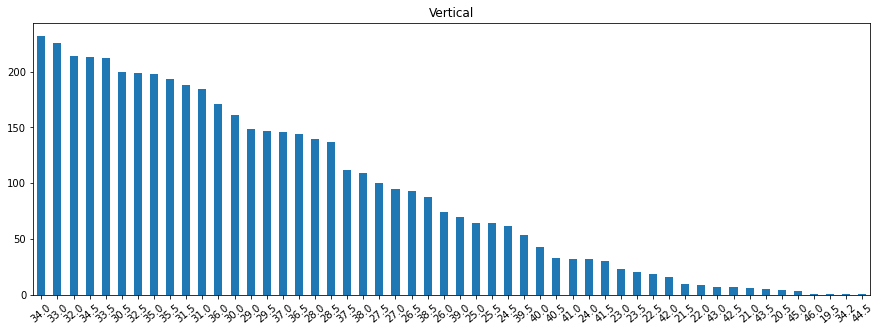

In [455]:
train['VerticalJump'].value_counts(normalize=False).plot.bar(title= 'Vertical', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

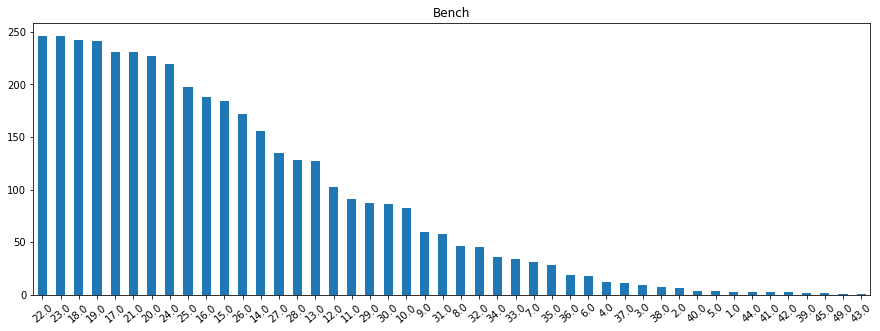

In [456]:
train['BenchPress'].value_counts(normalize=False).plot.bar(title= 'Bench', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

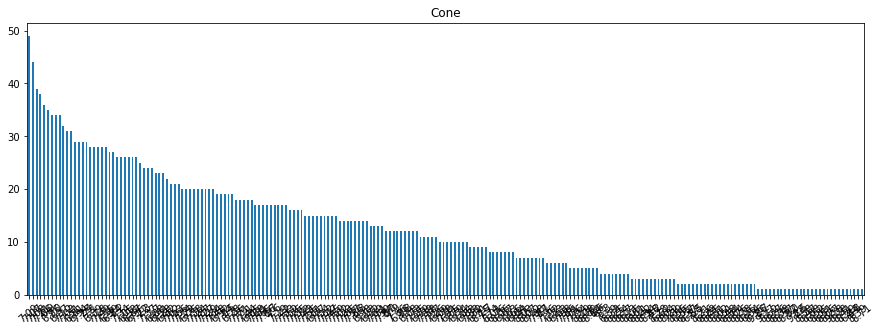

In [457]:
train['Cone'].value_counts(normalize=False).plot.bar(title= 'Cone', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

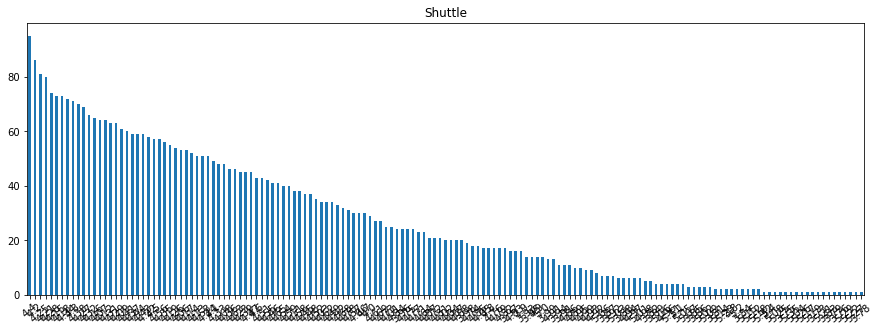

In [458]:
train['Shuttle'].value_counts(normalize=False).plot.bar(title= 'Shuttle', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

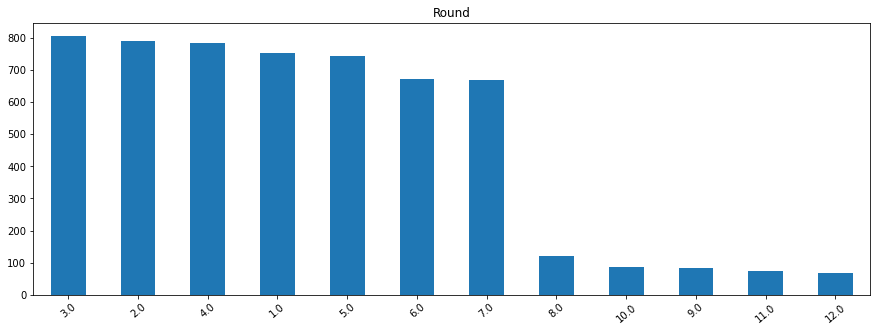

In [459]:
train['Round'].value_counts(normalize=False).plot.bar(title= 'Round', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

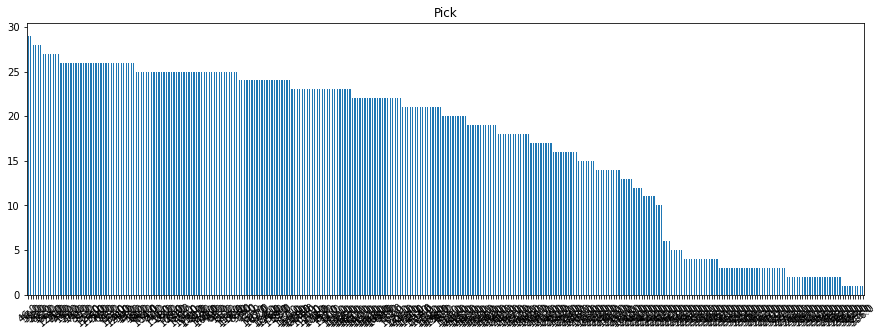

In [460]:
train['Pick'].value_counts(normalize=False).plot.bar(title= 'Pick', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

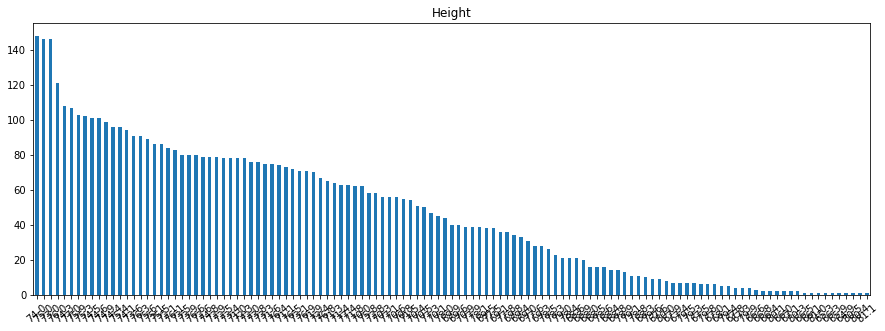

In [461]:
train['Height'].value_counts(normalize=False).plot.bar(title= 'Height', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

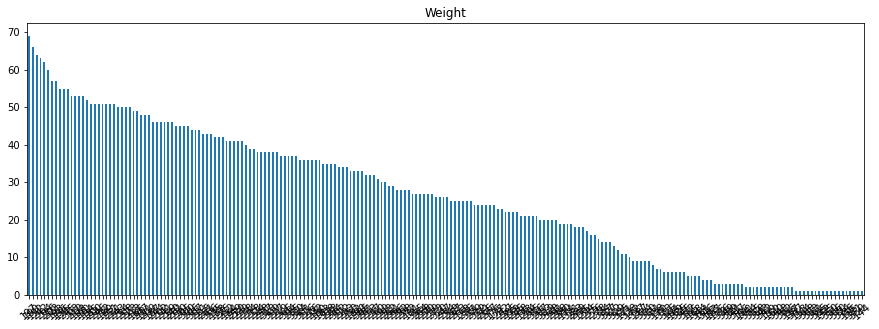

In [462]:
train['Weight'].value_counts(normalize=False).plot.bar(title= 'Weight', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

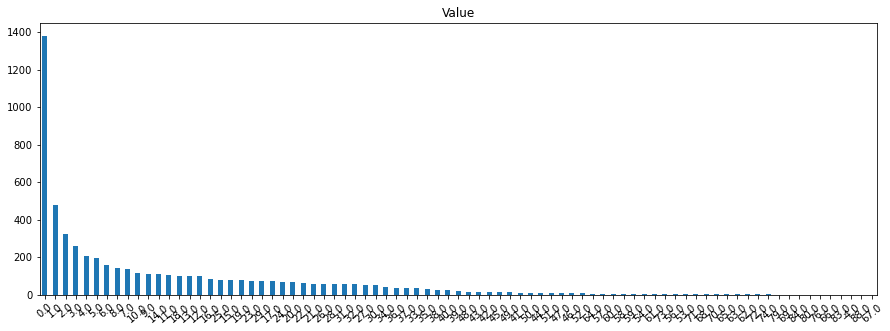

In [463]:
train['AV'].value_counts(normalize=False).plot.bar(title= 'Value', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

In [464]:
train["Pick"].size

5647

In [465]:
train["Pick"].value_counts()

46.0     29
57.0     29
39.0     28
52.0     28
23.0     28
82.0     28
15.0     27
32.0     27
96.0     27
123.0    27
54.0     27
71.0     27
27.0     27
94.0     26
48.0     26
13.0     26
35.0     26
25.0     26
10.0     26
75.0     26
70.0     26
31.0     26
37.0     26
56.0     26
124.0    26
22.0     26
115.0    26
51.0     26
30.0     26
76.0     26
62.0     26
73.0     26
20.0     26
95.0     26
133.0    26
66.0     26
128.0    26
44.0     26
50.0     26
19.0     26
17.0     26
43.0     26
36.0     26
18.0     25
64.0     25
60.0     25
88.0     25
104.0    25
34.0     25
1.0      25
92.0     25
49.0     25
137.0    25
14.0     25
28.0     25
38.0     25
55.0     25
101.0    25
29.0     25
65.0     25
84.0     25
140.0    25
8.0      25
106.0    25
89.0     25
110.0    25
171.0    25
93.0     25
81.0     25
97.0     25
147.0    25
109.0    25
41.0     25
47.0     25
79.0     25
61.0     25
45.0     25
11.0     25
53.0     25
26.0     25
114.0    25
116.0    25
67.0     25
72.0

In [466]:
# Normalize can be set to True to print proportions instead of number 
train["Pick"].value_counts(normalize=True)*100

46.0     0.513547
57.0     0.513547
39.0     0.495838
52.0     0.495838
23.0     0.495838
82.0     0.495838
15.0     0.478130
32.0     0.478130
96.0     0.478130
123.0    0.478130
54.0     0.478130
71.0     0.478130
27.0     0.478130
94.0     0.460421
48.0     0.460421
13.0     0.460421
35.0     0.460421
25.0     0.460421
10.0     0.460421
75.0     0.460421
70.0     0.460421
31.0     0.460421
37.0     0.460421
56.0     0.460421
124.0    0.460421
22.0     0.460421
115.0    0.460421
51.0     0.460421
30.0     0.460421
76.0     0.460421
62.0     0.460421
73.0     0.460421
20.0     0.460421
95.0     0.460421
133.0    0.460421
66.0     0.460421
128.0    0.460421
44.0     0.460421
50.0     0.460421
19.0     0.460421
17.0     0.460421
43.0     0.460421
36.0     0.460421
18.0     0.442713
64.0     0.442713
60.0     0.442713
88.0     0.442713
104.0    0.442713
34.0     0.442713
1.0      0.442713
92.0     0.442713
49.0     0.442713
137.0    0.442713
14.0     0.442713
28.0     0.442713
38.0     0

Text(0.5, 1.0, 'Ht vs. Wt')

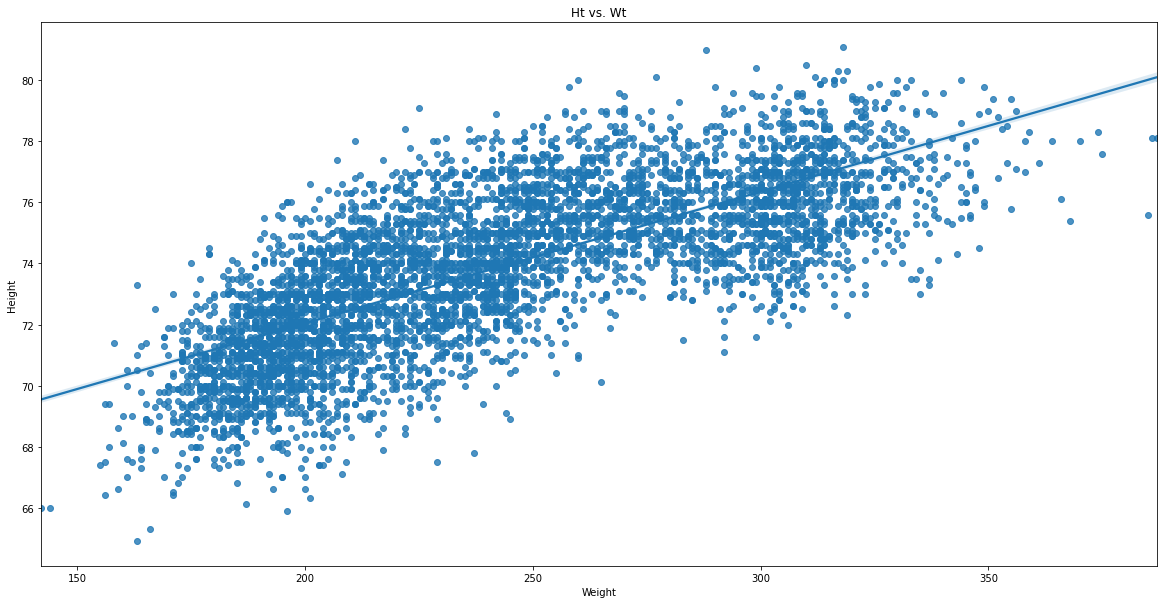

In [467]:
# Height vs Weight
sns.regplot(x='Weight',y='Height',data=df)
plt.title('Ht vs. Wt')

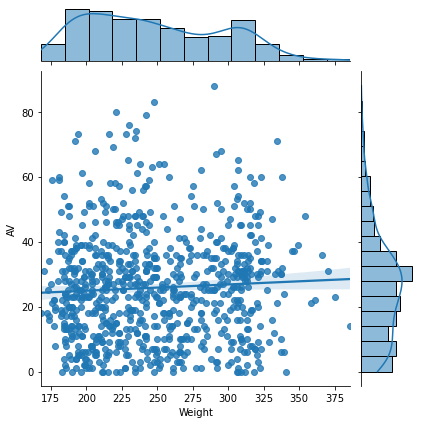

In [468]:
activeqb = df[df['Pick'] < 33]

def r2(Height, Weight):
    return stats.pearsonr(Heightt, AV)[0] ** 2
sns.jointplot(x='Weight',y='AV',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

In [469]:
train["Forty"].value_counts()

4.59    104
4.56    102
4.53     99
4.65     98
4.62     98
4.55     95
4.50     94
4.61     94
4.52     94
4.60     86
4.58     83
4.57     81
4.49     80
4.63     79
4.68     76
4.54     75
4.46     75
4.64     71
4.71     69
4.84     64
4.51     64
4.69     63
4.48     63
4.67     61
4.47     60
4.75     59
4.83     59
4.76     57
4.44     56
4.78     56
4.43     56
4.79     55
4.45     54
4.74     54
4.66     52
4.86     52
5.18     51
4.85     51
4.77     51
4.89     49
5.14     49
4.72     49
4.73     48
4.70     47
4.96     47
4.81     46
4.40     46
5.12     45
4.88     45
5.07     44
4.82     43
4.80     43
4.93     42
4.90     42
4.42     41
4.94     40
4.41     39
5.19     39
5.09     39
4.92     37
4.95     37
5.08     37
5.28     36
4.97     36
5.30     34
4.91     34
5.03     33
4.87     33
5.06     32
5.24     32
5.05     31
5.21     31
5.11     30
5.33     29
4.99     29
5.29     28
5.25     28
4.38     28
5.00     27
5.04     27
5.02     27
5.26     26
5.10     26
5.01

In [470]:
train["Forty"].round(2)

1       5.33
2       4.87
3       5.45
4       4.59
5       4.70
6       4.48
7       4.75
8       4.93
9       4.49
10      4.56
11      4.68
12      4.50
13      5.02
14      4.55
15      5.29
16      4.54
17      4.86
18       NaN
19      4.37
20      5.20
21      4.65
22      4.45
23      5.58
24      4.62
25      4.35
26      4.60
27       NaN
28      4.85
29      4.42
30      4.53
31      4.87
32      5.00
33      5.46
34      5.17
35      4.66
36      5.16
37      4.84
38      4.59
39       NaN
40      4.66
41      4.49
42      5.18
43      4.43
44      4.66
45       NaN
46      5.07
47      5.10
48      4.44
49      4.52
50      4.86
51      5.43
52       NaN
53      4.80
54      4.41
55      4.65
56      5.37
57      5.32
58      4.68
59      4.61
60      4.47
61      5.51
62      4.94
63       NaN
64      4.71
65       NaN
66      4.88
67      5.27
68      5.10
69      4.50
70      4.57
71      4.81
72      5.20
73      4.71
74      5.18
75      4.83
76      4.86
77      4.57

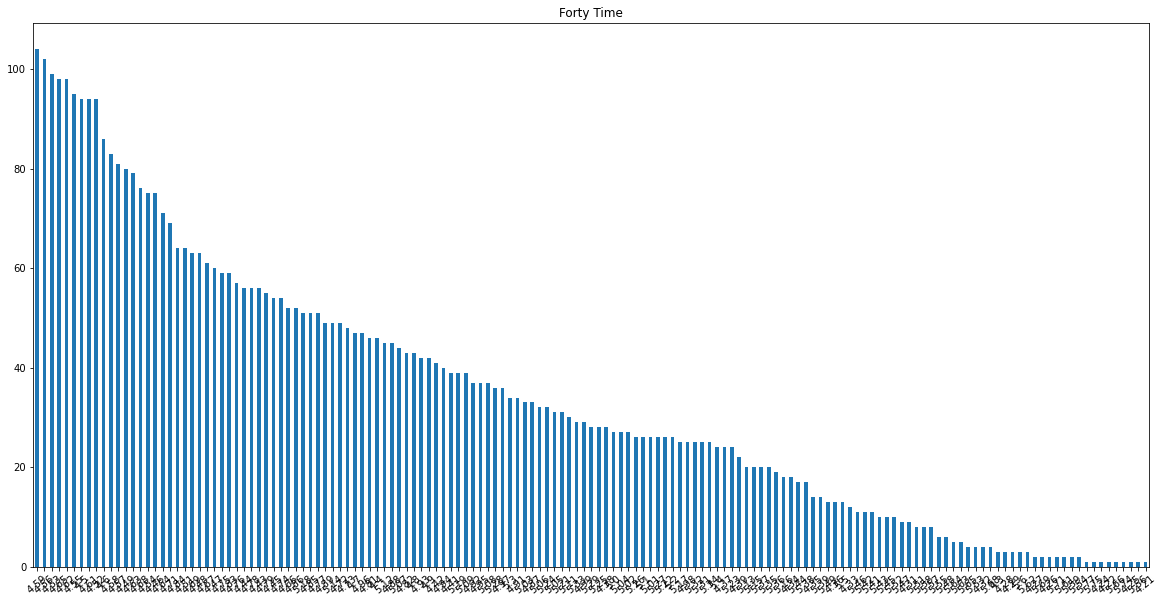

In [471]:
train['Forty'].value_counts(normalize=False).plot.bar(title= 'Forty Time', figsize=(20,10))
plt.xticks(rotation=40)
plt.show()

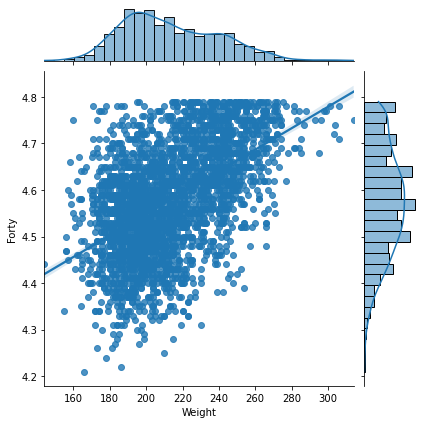

In [472]:
activeqb = df[df['Forty'] < 4.8] # looks at players on the more speeder side

def r2(Ht, AV):
    return stats.pearsonr(Weight, Forty)[0] ** 2
sns.jointplot(x='Weight',y='Forty',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

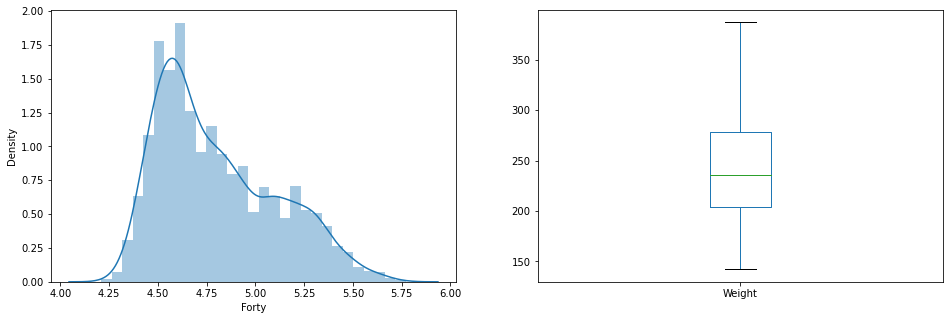

In [473]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["Forty"]);

plt.subplot(122)
train["Weight"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 1.0, 'Cor Plot')

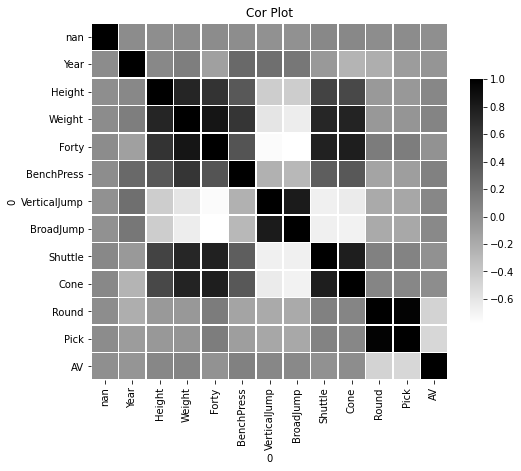

In [474]:
plt.figure(figsize=(8,9))
corr = df.corr()
sns.heatmap(corr,square=True,linewidths=.5, cbar_kws={"shrink": .5},cmap="binary")
plt.title('Cor Plot')

Text(0.5, 1.0, 'Picks by Round')

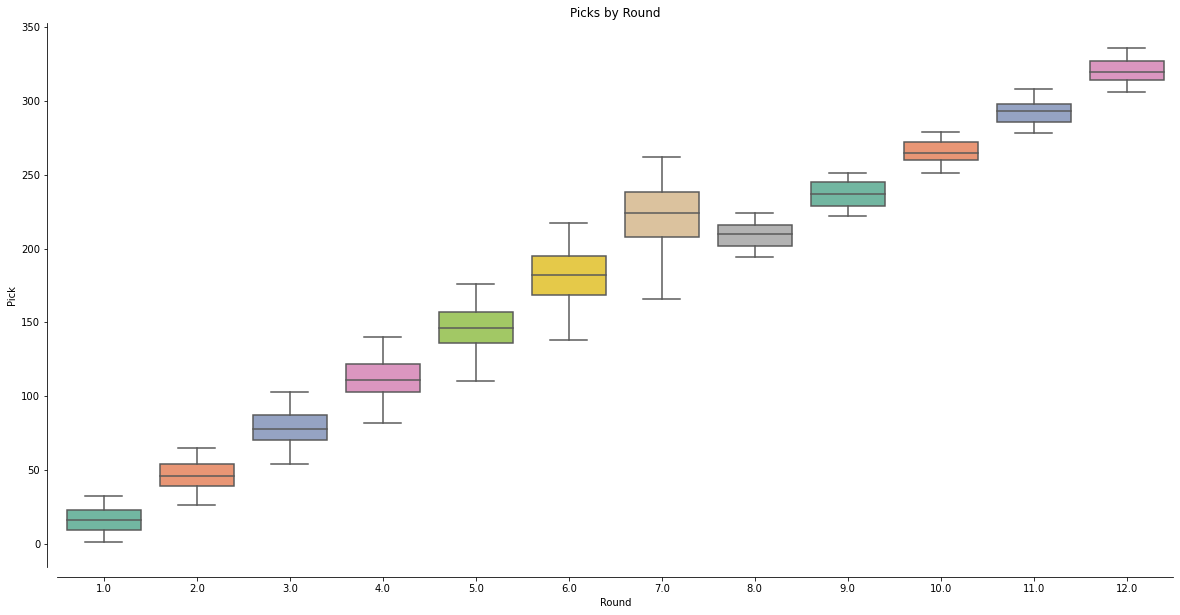

In [479]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Round',y='Pick',data=df,palette="Set2")
sns.despine(offset=10, trim=False)
plt.title('Picks by Round')

Text(0.5, 1.0, 'Drafted Positions')

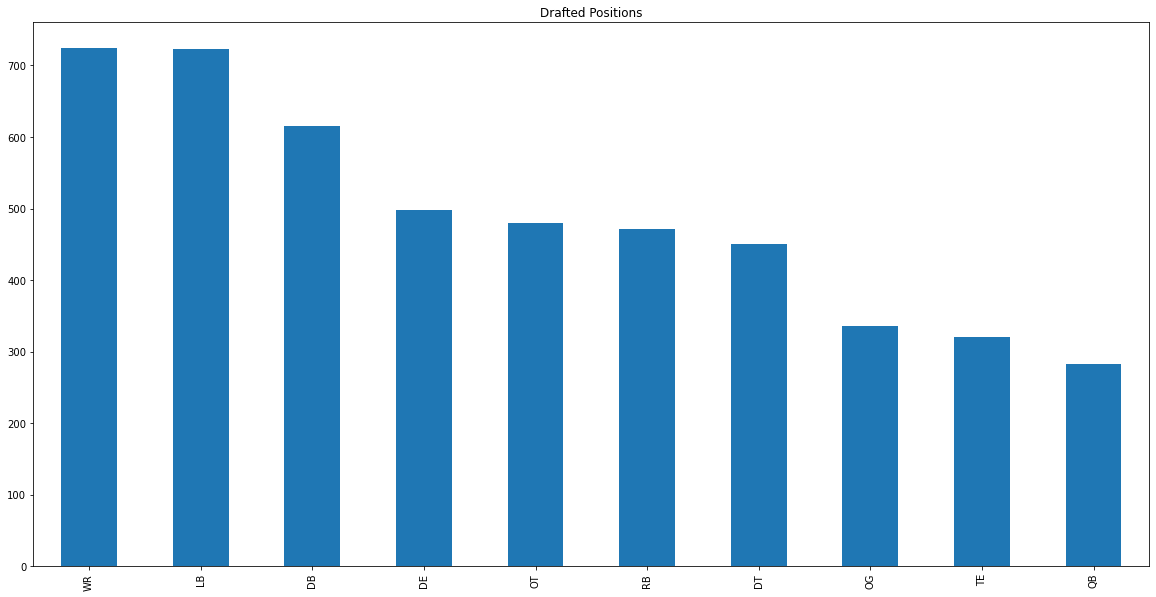

In [482]:
df.POS_x.value_counts().iloc[:10].plot(kind='bar')
plt.title('Drafted Positions')

In [477]:
oline = df[(df['POS_x'] == 'OT') | (df['POS_x'] == 'OG') | (df['POS_x'] == 'C')]
dline = df[(df['POS_x'] == 'EDGE') | (df['POS_x'] == 'NT') | (df['POS_x'] == 'DT') | (df['POS_x'] == 'DE')]
skill = df[(df['POS_x'] == 'QB') | (df['POS_x'] == 'RB') | (df['POS_x']=='WR') | (df['POS_x'] == 'TE') | (df['POS_x'] == 'FB')]
special = df[(df['POS_x'] == 'K') | (df['POS_x'] == 'P') | (df['POS_x']=='LS')]
db = df[(df['POS_x'] == 'SS') | (df['POS_x'] == 'FS') | (df['POS_x']=='S') | (df['POS_x'] == 'CB') | (df['POS_x'] == 'DB')]
lb = df[(df['POS_x'] == 'OLB') | (df['POS_x'] == 'ILB') | (df['POS_x']=='LB')]

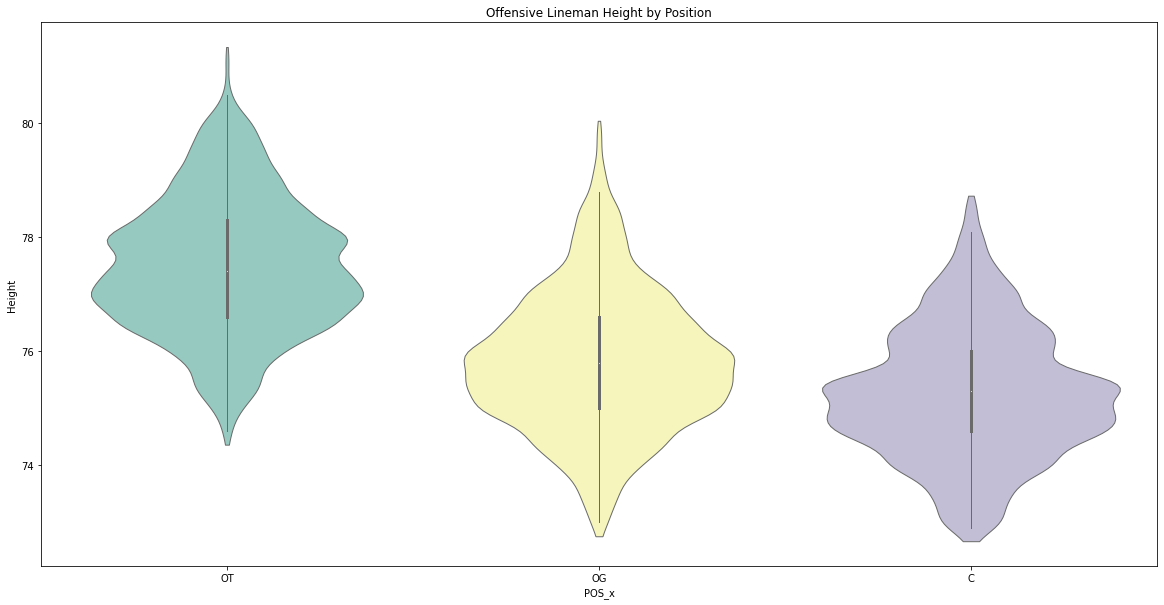

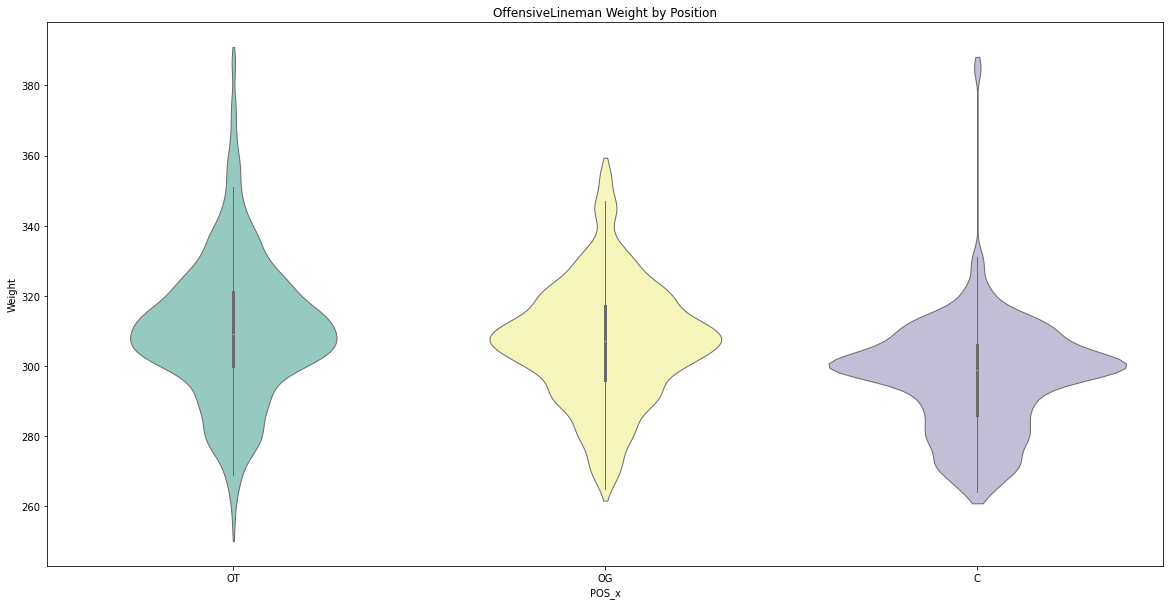

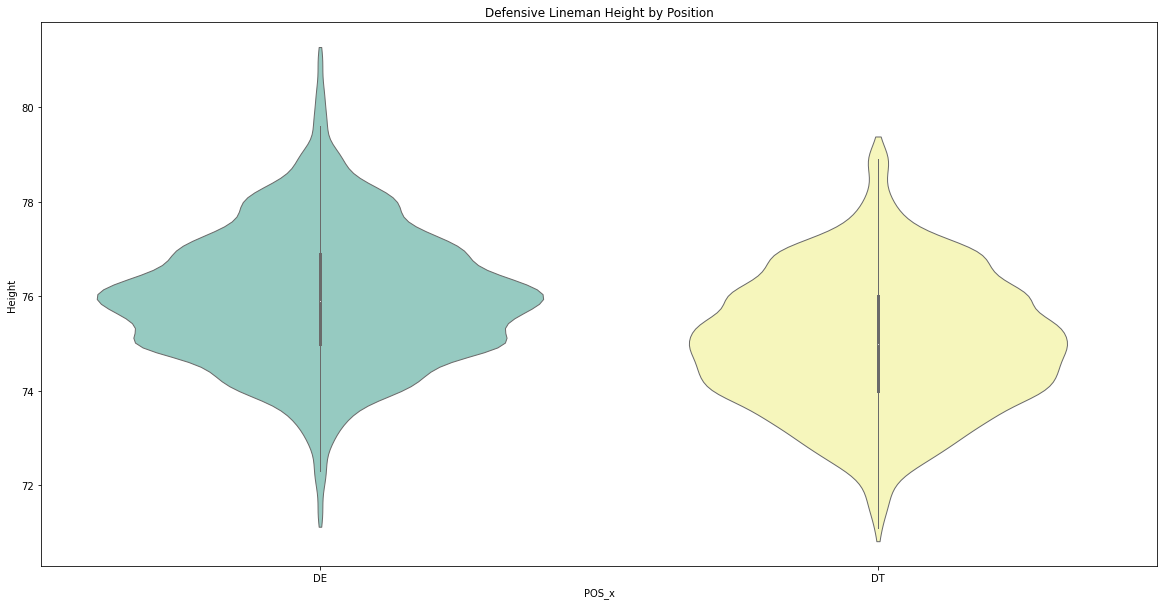

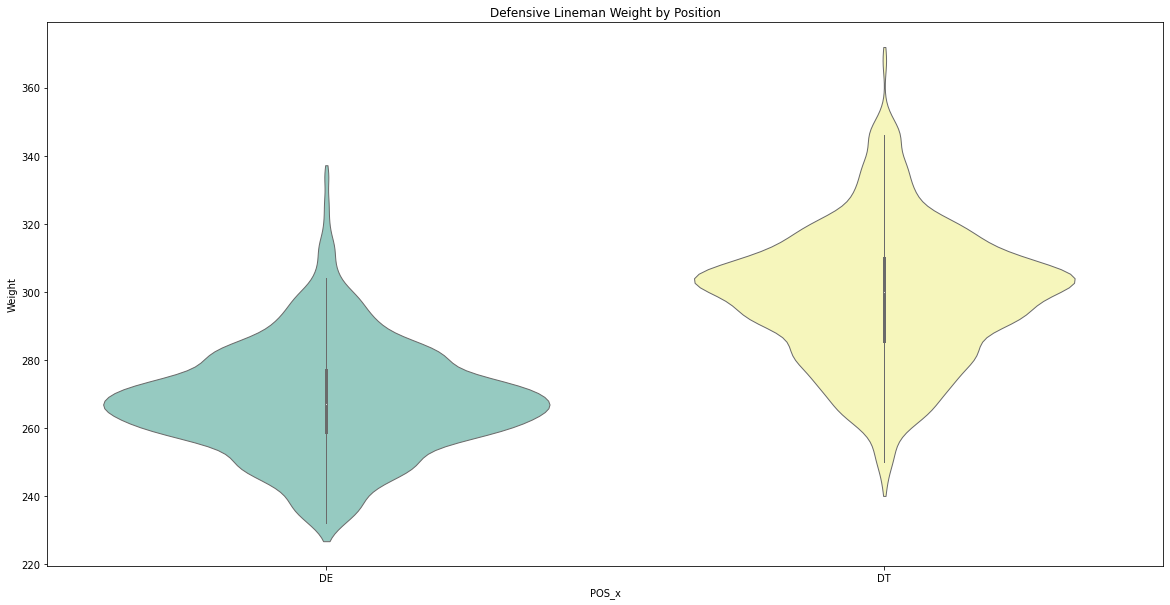

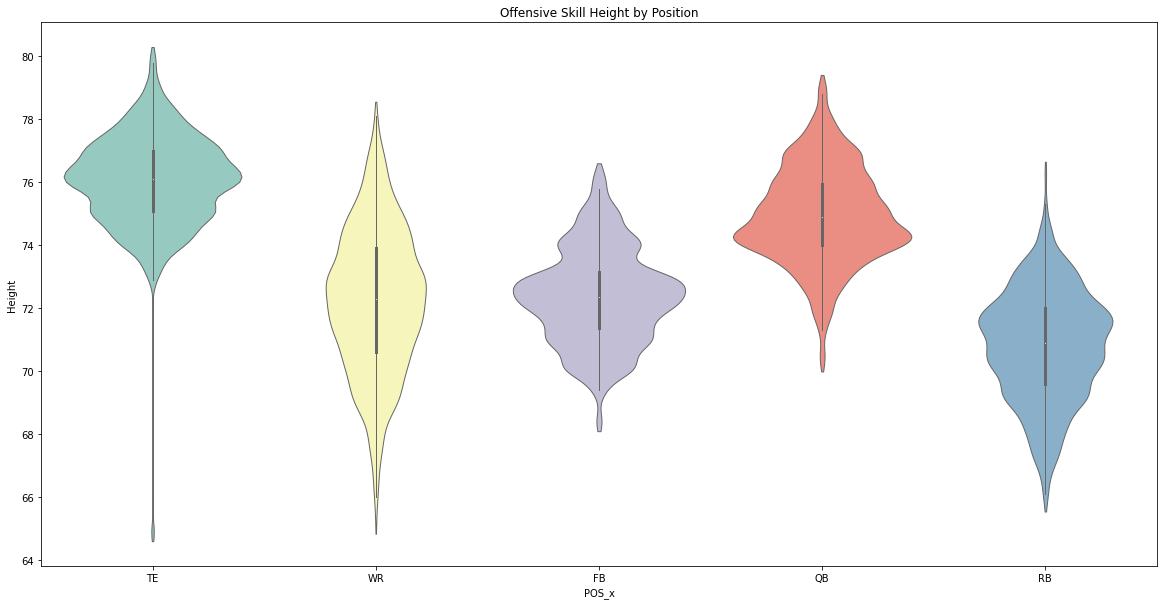

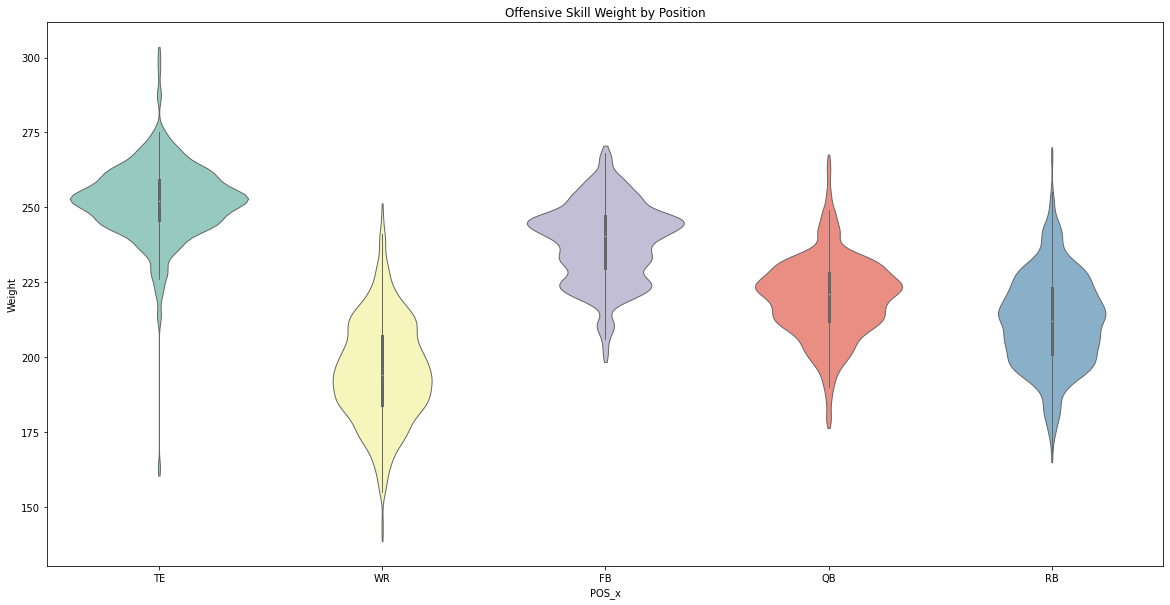

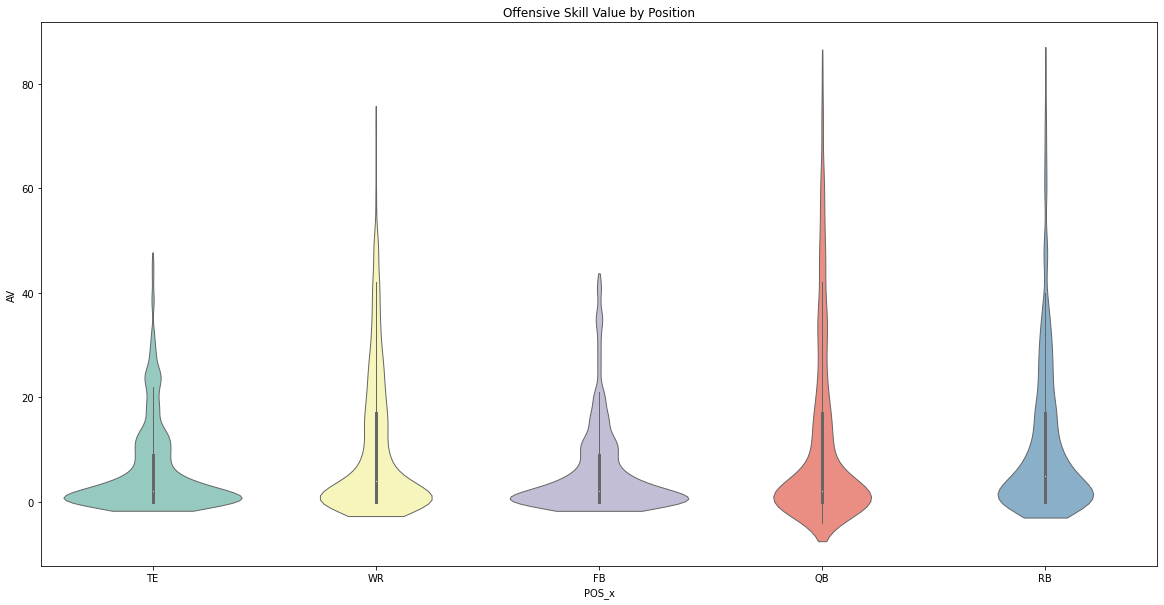

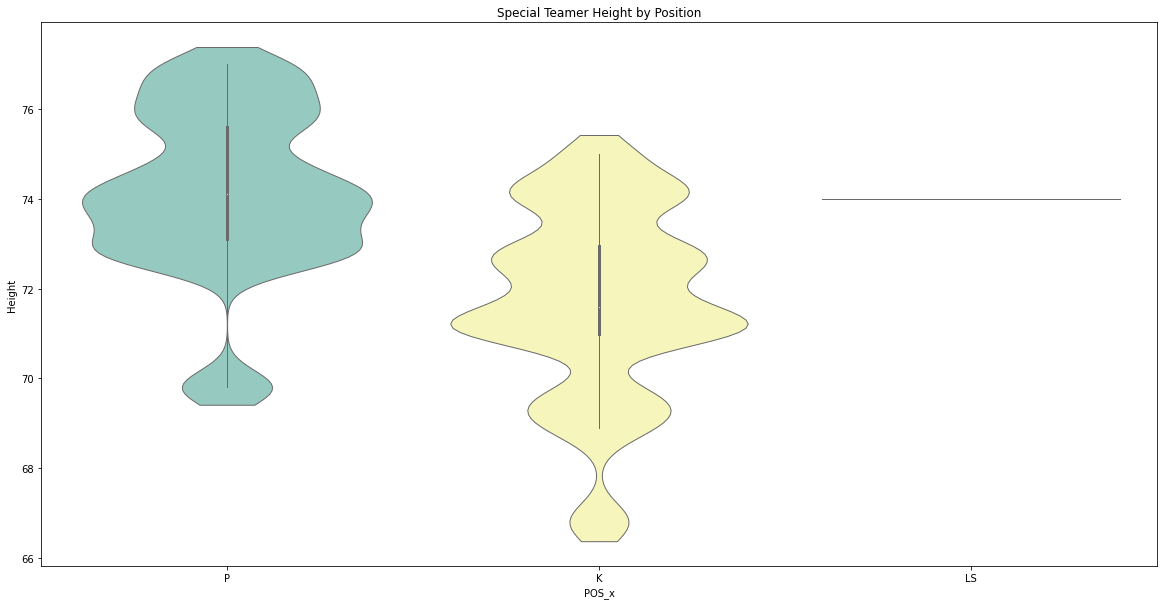

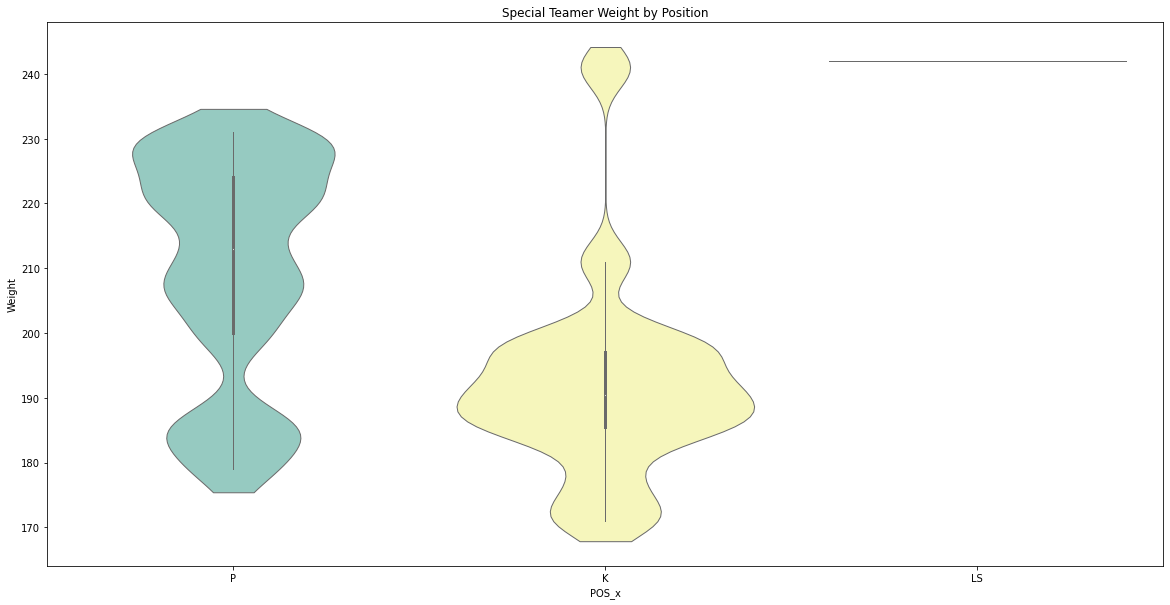

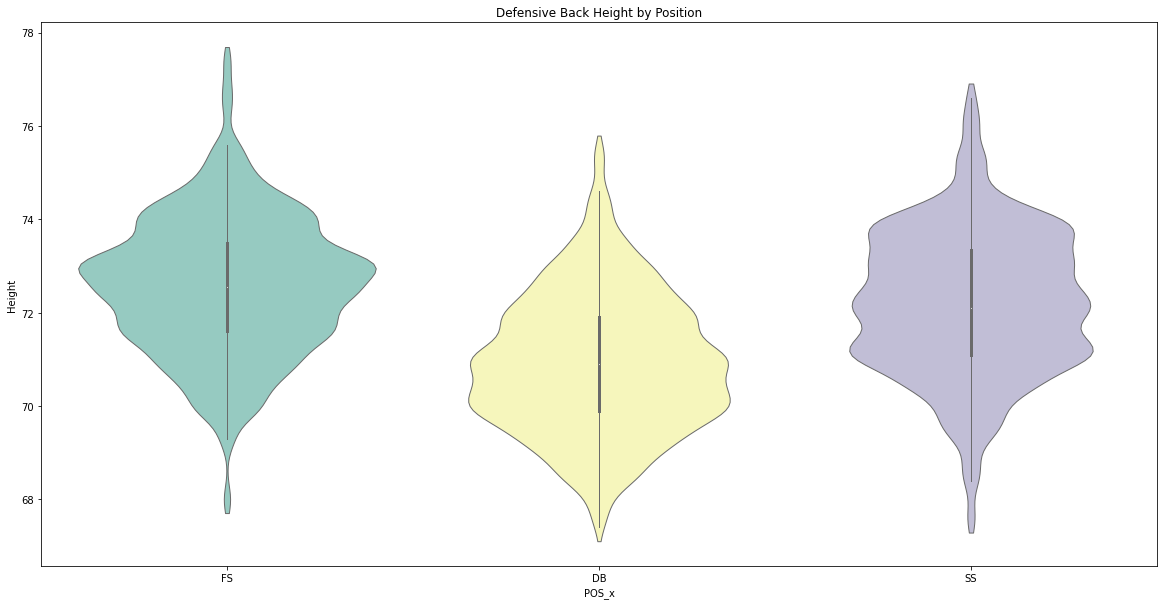

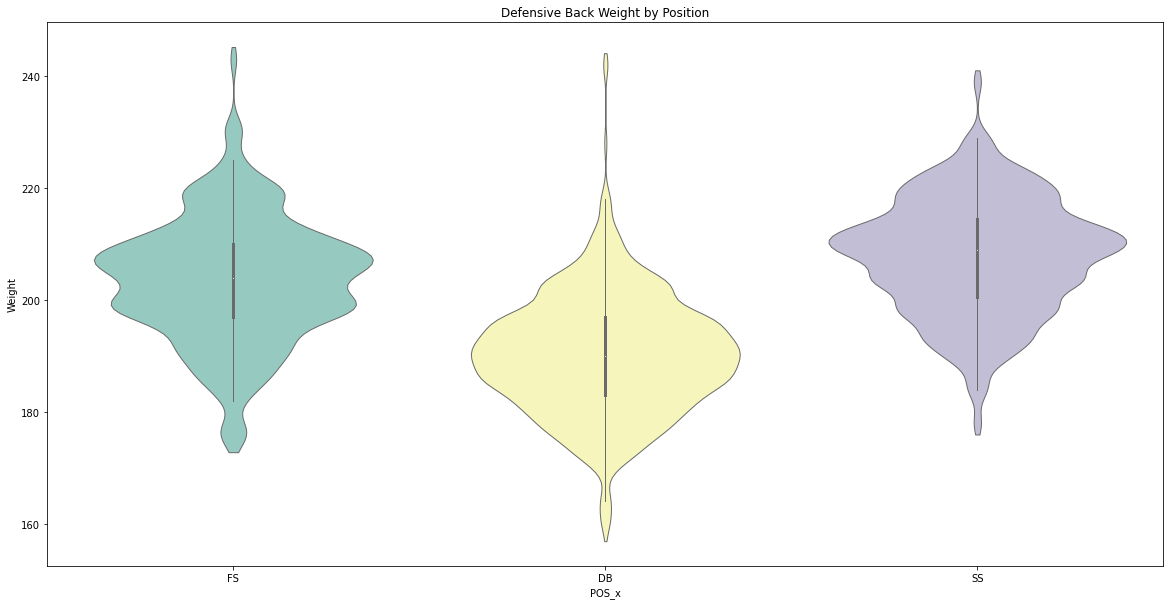

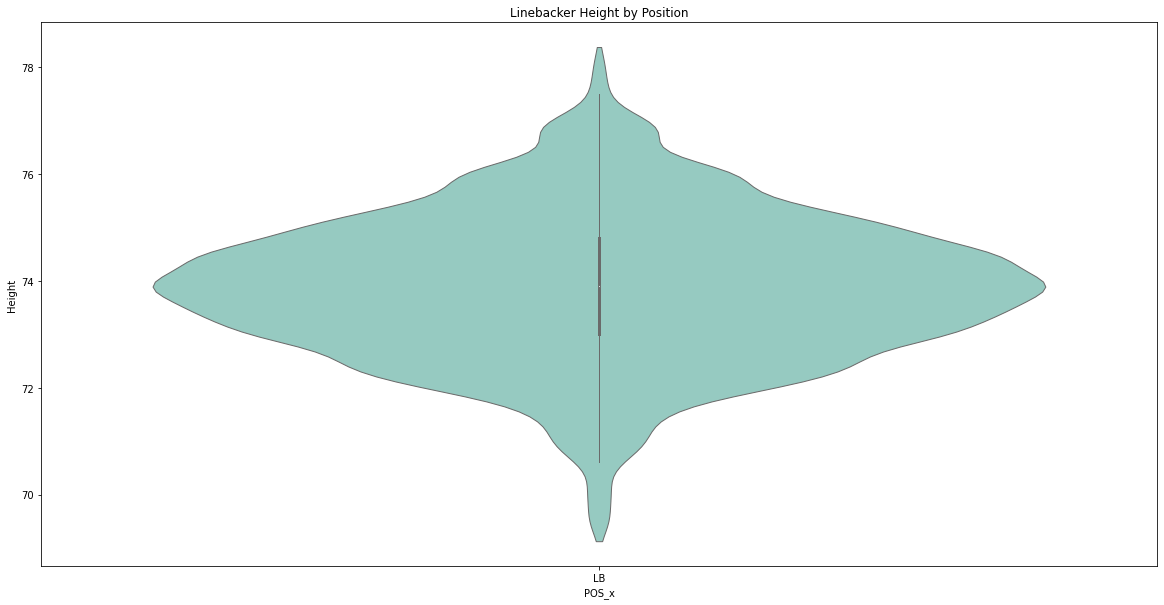

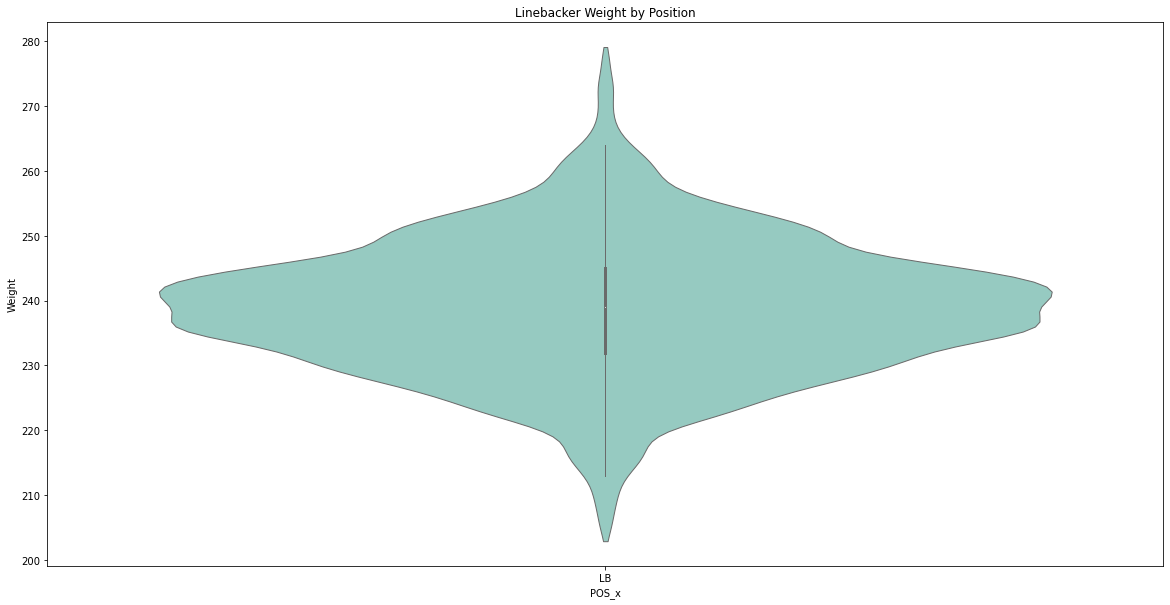

In [478]:
sns.violinplot(x='POS_x',y='Height',data=oline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Lineman Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=oline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('OffensiveLineman Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=dline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Lineman Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=dline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Lineman Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='AV',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Value by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=special,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Special Teamer Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=special,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Special Teamer Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=db,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Back Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=db,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Back Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=lb,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Linebacker Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=lb,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Linebacker Weight by Position')
plt.show()

In [485]:
# Filling Combine Drill Stats with the median value if NaN
df['Forty']=df.groupby(["POS_x"]).Forty.apply(lambda x: x.fillna(x.mean()))
df['VerticalJump']=df.groupby(["POS_x"]).VerticalJump.apply(lambda x: x.fillna(x.mean()))
df['BenchPress']=df.groupby(["POS_x"]).BenchPress.apply(lambda x: x.fillna(x.mean()))
df['BroadJump']=df.groupby(["POS_x"]).BroadJump.apply(lambda x: x.fillna(x.mean()))
df['Cone']=df.groupby(["POS_x"]).Cone.apply(lambda x: x.fillna(x.mean()))
df['Shuttle']=df.groupby(["POS_x"]).Shuttle.apply(lambda x: x.fillna(x.mean()))
df['Pick']= df['Pick'].astype(int)

In [486]:
df.head(10)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.000000,30.000000,98.000000,4.910000,7.864130,NaN,NaN,7.0,176,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.000000,34.000000,117.000000,4.120000,6.710000,NaN,Yale,6.0,181,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.000000,30.000000,105.000000,4.530000,7.950000,NaN,Wyoming,3.0,83,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,14.124424,34.500000,116.000000,4.198658,6.985079,NaN,Wyoming,2.0,41,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.000000,35.000000,119.000000,4.090000,7.300937,11.35,Wyoming,5.0,169,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN
6,5.0,2014,Robert Herron,Wyoming,WR,69.1,193,9.8,30.5,NaN,4.48,18.000000,35.500000,124.000000,4.270000,6.840000,NaN,Wyoming,6.0,185,TAM,HerrRo00,No,WR,WR,0.0,22,2014,0,0,0,0,0,8,NaN,NaN,NaN,NaN,NaN,1,0,0,6,58,1,1,NaN,NaN
7,6.0,2001,Patrick Chukwurah,Wyoming,LB,73.6,238,8.5,31.5,NaN,4.75,24.000000,40.000000,119.000000,4.210000,7.340000,11.78,Wyoming,5.0,157,MIN,ChukPa20,No,LB,LB,5.0,22,2007,0,0,0,8,3,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,9
8,7.0,1991,Mitch Donahue,Wyoming,LB,74.3,254,10.0,32.5,NaN,4.93,24.000000,33.500000,111.000000,4.320000,7.190523,NaN,NaN,4.0,95,SFO,DonaMi20,No,LB,LB,2.0,23,1994,0,0,0,2,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
9,8.0,2014,Marqueston Huff,Wyoming,FS,71.1,196,9.0,31.4,NaN,4.49,15.000000,35.500000,116.000000,4.190000,7.260000,NaN,Wyoming,4.0,122,TEN,HuffMa00,No,DB,DB,3.0,22,2016,0,0,0,3,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1
10,9.0,2015,Mark Nzeocha,Wyoming,LB,74.4,232,10.0,33.0,NaN,4.56,24.000000,33.706954,115.734219,4.298739,7.190523,NaN,Wyoming,7.0,236,DAL,NzeoMa00,No,OLB,LB,0.0,25,2016,0,0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
df=df.dropna(subset=['Cone','Shuttle', 'Round'])

In [488]:
# linear regression predicting AV. 
X = df[['Height','Weight','Forty','VerticalJump','BenchPress','BroadJump','Cone','Shuttle','Year','AV', 'Round']]
Y = df[['Pick']]
   
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          3.780e+04
Date:                Sun, 28 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:53:44   Log-Likelihood:                         -23738.
No. Observations:                5615   AIC:                                  4.750e+04
Df Residuals:                    5604   BIC:                                  4.757e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height          -0.7595      0.129     -5.875      0.000      -1.013      -0.506
Weight           0.1934      0.014     13.607      0.000       0.166       0.221
Forty          -14.8991      1.882     -7.918      0.000     -18.588     -11.210
VerticalJump     0.4211      0.103      4.071      0.000       0.218       0.624
BenchPress       0.1628      0.053      3.098      0.002       0.060       0.266
BroadJump       -0.3238      0.049     -6.629      0.000      -0.420      -0.228
Cone            -3.9735      1.168     -3.401      0.001      -6.264      -1.683
Shuttle        -12.7202      1.658     -7.671      0.000     -15.971      -9.470
Year             0.0895      0.007     12.827      0.000       0.076       0.103
AV              -0.2622      0.019    -14.141      0.000      -0.299      -0.226
Round           30.1387      0.108    279.565      0.000      29.927      30.350
==============================================================================
Omnibus:                      118.203   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.082
Skew:                           0.343   Prob(JB):                     2.54e-28
Kurtosis:                       3.267   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [489]:
X = df[['Height', 'Forty',  'Shuttle', 'Cone']]
Y = df[['Pick']]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              3668.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:53:49   Log-Likelihood:                         -32259.
No. Observations:                5615   AIC:                                  6.453e+04
Df Residuals:                    5611   BIC:                                  6.455e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height        -2.2520      0.335     -6.716      0.000      -2.909      -1.595
Forty         70.7719      6.419     11.025      0.000      58.188      83.356
Shuttle       21.2826      7.215      2.950      0.003       7.138      35.427
Cone         -19.9143      4.930     -4.039      0.000     -29.580     -10.249
==============================================================================
Omnibus:                      357.231   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.054
Skew:                           0.346   Prob(JB):                     1.21e-47
Kurtosis:                       2.333   Cond. No.                         592.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
df.head(10)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.000000,30.000000,98.000000,4.910000,7.864130,NaN,NaN,7.0,176,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.000000,34.000000,117.000000,4.120000,6.710000,NaN,Yale,6.0,181,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.000000,30.000000,105.000000,4.530000,7.950000,NaN,Wyoming,3.0,83,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,14.124424,34.500000,116.000000,4.198658,6.985079,NaN,Wyoming,2.0,41,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.000000,35.000000,119.000000,4.090000,7.300937,11.35,Wyoming,5.0,169,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN
6,5.0,2014,Robert Herron,Wyoming,WR,69.1,193,9.8,30.5,NaN,4.48,18.000000,35.500000,124.000000,4.270000,6.840000,NaN,Wyoming,6.0,185,TAM,HerrRo00,No,WR,WR,0.0,22,2014,0,0,0,0,0,8,NaN,NaN,NaN,NaN,NaN,1,0,0,6,58,1,1,NaN,NaN
7,6.0,2001,Patrick Chukwurah,Wyoming,LB,73.6,238,8.5,31.5,NaN,4.75,24.000000,40.000000,119.000000,4.210000,7.340000,11.78,Wyoming,5.0,157,MIN,ChukPa20,No,LB,LB,5.0,22,2007,0,0,0,8,3,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,9
8,7.0,1991,Mitch Donahue,Wyoming,LB,74.3,254,10.0,32.5,NaN,4.93,24.000000,33.500000,111.000000,4.320000,7.190523,NaN,NaN,4.0,95,SFO,DonaMi20,No,LB,LB,2.0,23,1994,0,0,0,2,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
9,8.0,2014,Marqueston Huff,Wyoming,FS,71.1,196,9.0,31.4,NaN,4.49,15.000000,35.500000,116.000000,4.190000,7.260000,NaN,Wyoming,4.0,122,TEN,HuffMa00,No,DB,DB,3.0,22,2016,0,0,0,3,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1
10,9.0,2015,Mark Nzeocha,Wyoming,LB,74.4,232,10.0,33.0,NaN,4.56,24.000000,33.706954,115.734219,4.298739,7.190523,NaN,Wyoming,7.0,236,DAL,NzeoMa00,No,OLB,LB,0.0,25,2016,0,0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# X_predict = df[['Wt','Vertical','Cone','Pick']]  
# y_predict = model.predict(X_predict)

# # Actual value over predicted value
# print(df['AV'] - y_predict)

In [491]:
The_GOAT=df[df['Name'] =='Tom Brady']
The_GOAT.head()

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
3089,3088.0,2000,Tom Brady,Michigan,QB,76.4,211,9.4,32.8,33,5.3,14.294118,24.5,99.0,4.38,7.2,NaN,Michigan,6.0,199,NWE,BradTo00,No,QB,QB,51.0,23,2016,2,11,14,160,160,231,5098,7998,59943,444,151,523,939,17,2,59,0,9,NaN,NaN


In [492]:
X_predict = The_GOAT[['Height', 'Forty',  'Shuttle', 'Cone']]  
y_predict = model.predict(X_predict)

# Actual value over predicted value, results show that Lacy would have been predicted as the 60th Pick
The_GOAT['Pick'] - y_predict

3089    46.124937
dtype: float64

In [493]:
PosQB=df[df['POS_x'] == 'QB']
# PosQB=PosQB[PosQB['AV'] > 0]
PosQB.sort_values('Name')

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
5632,5631.0,2014,A.J. McCarron,Alabama,QB,75.3,220,NaN,NaN,NaN,4.94000,14.294118,28.000000,99.00000,4.340000,7.183333,NaN,Alabama,5.0,164,CIN,McCaA.00,No,QB,QB,0.0,24,2016,0,0,0,3,3,8,79,119,854,6,2,14,31,0,NaN,NaN,NaN,NaN,NaN,NaN
483,482.0,1999,Aaron Brooks,Virginia,QB,75.5,203,9.5,32.0,17,4.59000,14.294118,35.500000,118.00000,4.290000,7.520000,NaN,Virginia,4.0,131,GNB,BrooAa00,No,QB,QB,64.0,23,2006,0,0,6,65,NaN,93,1673,2963,20261,123,92,362,1534,13,1,1,0,11,NaN,NaN
5012,5011.0,2005,Aaron Rodgers,California,QB,74.0,223,10.1,32.3,39,4.75000,14.294118,34.500000,110.00000,4.322558,7.380000,NaN,California,1.0,24,GNB,RodgAa00,No,QB,QB,34.0,21,2016,2,5,9,112,112,136,2892,4457,35160,282,72,474,2434,24,1,-1,0,6,NaN,NaN
4405,4404.0,2005,Adrian McPherson,Florida State,QB,75.5,218,9.0,32.8,26,4.73000,22.000000,34.500000,128.00000,4.080000,6.930000,NaN,Florida St.,5.0,152,NOR,NaN,No,QB,QB,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,1976.0,1999,Akili Smith,Oregon,QB,74.8,227,9.8,32.3,26,4.70000,14.294118,34.000000,111.00000,4.290000,6.990000,NaN,Oregon,1.0,3,CIN,SmitAk00,No,QB,QB,1.0,24,2002,0,0,1,1,1,22,215,461,2212,5,13,70,371,1,1,6,0,NaN,NaN,NaN
239,238.0,2008,Alex Brink,Washington State,QB,74.3,211,8.5,32.4,27,5.03000,14.294118,28.000000,112.00000,4.190000,7.220000,NaN,Washington St.,7.0,223,HOU,BrinAl00,No,QB,QB,0.0,23,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,564.0,2005,Alex Smith,Utah,QB,76.1,217,9.1,31.8,40,4.78000,14.294118,32.000000,113.00000,3.960000,6.820000,NaN,Utah,1.0,1,SFO,SmitAl03,No,QB,QB,14.0,21,2016,0,1,8,72,31,135,2411,3921,26421,151,87,446,1998,10,2,-10,0,9,NaN,NaN
566,565.0,2005,Alex Smith,Utah,QB,76.1,217,9.1,31.8,40,4.78000,14.294118,32.000000,113.00000,3.960000,6.820000,NaN,Stanford,3.0,71,TAM,SmitAl02,No,TE,TE,11.0,23,2015,0,0,3,11,10,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,1473,13,12,NaN,NaN
1766,1765.0,1993,Alex Van Pelt,Pittsburgh,QB,72.0,212,9.8,31.9,NaN,4.97000,14.294118,30.500000,108.96861,4.322558,7.183333,NaN,NaN,8.0,216,PIT,VanPAl00,No,QB,QB,0.0,23,2003,0,0,1,7,NaN,31,262,477,2985,16,24,32,53,1,NaN,NaN,NaN,NaN,NaN,NaN
1285,1284.0,2012,Andrew Luck,Stanford,QB,76.0,234,10.0,32.6,37,4.59000,14.294118,36.000000,124.00000,4.280000,6.800000,NaN,Stanford,1.0,1,IND,LuckAn00,No,QB,QB,48.0,23,2016,0,3,4,45,45,65,1460,2481,17665,120,63,273,1347,13,NaN,NaN,NaN,6,NaN,NaN


In [494]:
X_predict = PosQB[['Height', 'Forty',  'Shuttle', 'Cone']]  
y_predict = model.predict(X_predict)

In [495]:
# Shows the predicted gain or loss in value
y_predict

20      155.266403
30      109.850484
106     157.461618
147     112.668527
155     129.089123
168     105.532630
192     140.012950
205     118.247476
228     123.775987
239     134.053819
261     114.726387
262     114.356846
282     104.273681
303     118.012422
304     124.326685
307     133.876170
308     135.282459
313     126.328607
328     138.421913
355     129.238924
360     104.433541
369      93.244390
372      98.944718
388     104.473115
435     126.129385
448     128.626102
449     130.856902
467     121.154253
483      96.365779
495     131.418531
497     120.111519
525     142.311818
565     115.378013
566     115.378013
641     119.017884
645     104.798885
651     127.132610
652     140.896491
653     124.563024
659     124.131108
663     146.684888
672     112.627324
673     123.691110
675     148.328698
684     114.250457
695     132.369219
703     121.850634
717     109.124783
729     130.100200
745     115.862556
759     147.753671
764     124.669920
812     128.

In [496]:
# shows actual pick subtracted by the prediction for increased or decreased value 
PosQB['Pick'] - y_predict

20       86.733597
30      -34.850484
106     -45.461618
147     -68.668527
155      38.910877
168     -66.532630
192     -38.012950
205    -116.247476
228    -122.775987
239      88.946181
261     -55.726387
262       3.643154
282     -96.273681
303      98.987578
304     -48.326685
307     -47.876170
308     -58.282459
313     -68.328607
328    -106.421913
355     -22.238924
360      75.566459
369     -92.244390
372      21.055282
388     -78.473115
435     157.870615
448     -38.626102
449     -90.856902
467     133.845747
483      34.634221
495     180.581469
497    -109.111519
525      49.688182
565    -114.378013
566     -44.378013
641    -107.017884
645      42.201115
651      23.867390
652     168.103509
653      61.436976
659     103.868892
663      50.315112
672      82.372676
673     -73.691110
675    -116.328698
684     -92.250457
695      76.630781
703     116.149366
717      84.875217
729      74.899800
745      85.137444
759     -96.753671
764      58.330080
812     -93.

In [497]:
data1 = y_predict
data2 = df['Pick']
Raitings=df['Pick']

fig = go.Figure(data=[
    go.Bar(name='Pick', x=Raitings, y= data2),
    go.Bar(name='Change', x=Raitings, y= data1)
])
# Change the bar mode
fig.update_layout(barmode='stack', title='Predicted Change')
fig.update_traces()
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')
fig.show()

In [50]:
# Logistic Regression

In [498]:
train.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.000000,30.0,98.0,4.910000,7.864130,NaN,NaN,7.0,176,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.000000,34.0,117.0,4.120000,6.710000,NaN,Yale,6.0,181,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.000000,30.0,105.0,4.530000,7.950000,NaN,Wyoming,3.0,83,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,14.124424,34.5,116.0,4.198658,6.985079,NaN,Wyoming,2.0,41,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.000000,35.0,119.0,4.090000,7.300937,11.35,Wyoming,5.0,169,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [499]:
test.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.0,30.0,98.0,4.91,NaN,NaN,NaN,7.0,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.0,34.0,117.0,4.12,6.71,NaN,Yale,6.0,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.0,30.0,105.0,4.53,7.95,NaN,Wyoming,3.0,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116.0,NaN,NaN,NaN,Wyoming,2.0,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.0,35.0,119.0,4.09,NaN,11.35,Wyoming,5.0,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [500]:
x_train,x_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.20,random_state=1)

In [501]:
logistic_model = LogisticRegression(random_state=1)

In [502]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [503]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [504]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [505]:
score_logistic

0.5342831700801425

In [59]:
# Random Forest

In [506]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [507]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [508]:
pred_cv_forest=forest_model.predict(x_cv)

In [509]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [510]:
score_forest

0.7123775601068566

In [65]:
# Decision Tree

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree

In [404]:
df2 = pd.read_csv("merged.csv", sep=",", header=None, engine='python') 

In [405]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df2.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [406]:
df2['Pick'] = df2.Pick.fillna(260)
df2['Round'] = df2.Round.fillna(8)
df2['Cone'] = df2.Cone.fillna(7)
df2['Shuttle'] = df2.Shuttle.fillna(4)
df2['BroadJump'] = df2.BroadJump.fillna(113)
# df2['Cone']=df2.Cone.apply(lambda x: x.fillna(x.mean()))
# df2['Shuttle']=df2.Shuttle.apply(lambda x: x.fillna(x.mean()))

In [407]:
df2["Forty"] = df2.Forty.astype(float)
df2["VerticalJump"] = df2.VerticalJump.astype(float)
df2["BenchPress"] = df2.BenchPress.astype(float)
#df2["BroadJump"] = df2.BroadJump.astype(float)
df2["Cone"] = df2.Cone.astype(float)
df2["Shuttle"] = df2.Shuttle.astype(float)
df2["Round"] = df2.Round.astype(float)
df2["Pick"] = df2.Pick.astype(int)
df2["Year"] = df2.Year.astype(int)
df2["Height"] = df2.Height.astype(float)
#df2["Weight"] = df2.Weight.astype(int)
df2["AV"] = df2.AV.astype(float)

df2['Weight'] = df2['Weight'].astype(int)
df2['BroadJump'] = df2['BroadJump'].astype(float)

In [362]:
df2.dtypes

0
NaN                 float64
Year                  int32
Name                 object
College_x            object
POS_x                object
Height              float64
Weight                int32
HandSize             object
ArmLength            object
Wonderlic            object
Forty               float64
BenchPress          float64
VerticalJump        float64
BroadJump           float64
Shuttle             float64
Cone                float64
60YdShuttle          object
College_y            object
Round               float64
Pick                  int32
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                  float64
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [408]:
# Filling Combine Drill Stats with the median value if NaN
df2['Forty']=df2.groupby(["POS_x"]).Forty.apply(lambda x: x.fillna(x.mean()))
df2['VerticalJump']=df2.groupby(["POS_x"]).VerticalJump.apply(lambda x: x.fillna(x.mean()))
df2['BenchPress']=df2.groupby(["POS_x"]).BenchPress.apply(lambda x: x.fillna(x.mean()))
df2['BroadJump']=df2.groupby(["POS_x"]).BroadJump.apply(lambda x: x.fillna(x.mean()))
df2['Cone']=df2.groupby(["POS_x"]).Cone.apply(lambda x: x.fillna(x.mean()))
df2['Shuttle']=df2.groupby(["POS_x"]).Shuttle.apply(lambda x: x.fillna(x.mean()))

In [237]:
df2=df2.dropna(subset=['Cone','Shuttle'])

In [409]:
columns="Height Forty BroadJump Shuttle Cone Pick AV".split()

In [410]:
df3=pd.DataFrame(df2, columns=columns)
df3.head(100)

,Height,Forty,BroadJump,Shuttle,Cone,Pick,AV
1,76.0,5.330000,98.0,4.91,7.00,176,0.0
2,78.0,4.870000,117.0,4.12,6.71,181,0.0
3,75.9,5.450000,105.0,4.53,7.95,83,0.0
4,72.9,4.590000,116.0,4.00,7.00,41,2.0
5,70.8,4.700000,119.0,4.09,7.00,169,0.0
6,69.1,4.480000,124.0,4.27,6.84,185,0.0
7,73.6,4.750000,119.0,4.21,7.34,157,5.0
8,74.3,4.930000,111.0,4.32,7.00,95,2.0
9,71.1,4.490000,116.0,4.19,7.26,122,3.0
10,74.4,4.560000,113.0,4.00,7.00,236,0.0


In [411]:
df3 = df3.dropna(axis=1)
df3.head(100)

,Height,Forty,BroadJump,Shuttle,Cone,Pick,AV
1,76.0,5.330000,98.0,4.91,7.00,176,0.0
2,78.0,4.870000,117.0,4.12,6.71,181,0.0
3,75.9,5.450000,105.0,4.53,7.95,83,0.0
4,72.9,4.590000,116.0,4.00,7.00,41,2.0
5,70.8,4.700000,119.0,4.09,7.00,169,0.0
6,69.1,4.480000,124.0,4.27,6.84,185,0.0
7,73.6,4.750000,119.0,4.21,7.34,157,5.0
8,74.3,4.930000,111.0,4.32,7.00,95,2.0
9,71.1,4.490000,116.0,4.19,7.26,122,3.0
10,74.4,4.560000,113.0,4.00,7.00,236,0.0


In [426]:
main_columns = columns
X = df3.drop(columns=['AV']) # main data
y = df3.AV # Target variable

In [427]:
lm=LinearRegression()
lm

LinearRegression()

In [428]:
df3.shape

(5647, 7)

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2500)

In [430]:
classifier = DecisionTreeClassifier(max_depth=2) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [431]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.25309734513274335


In [432]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[286   0   0 ...   0   0   0]
 [ 98   0   0 ...   0   0   0]
 [ 71   0   0 ...   0   0   0]
 ...
 [  2   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40       286
         1.0       0.00      0.00      0.00        98
         2.0       0.00      0.00      0.00        71
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        36
         5.0       0.00      0.00      0.00        34
         6.0       0.00      0.00      0.00        29
         7.0       0.00      0.00      0.00        33
         8.0       0.00      0.00      0.00        27
         9.0       0.00      0.00      0.00        19
        10.0       0.00      0.00      0.00        28
        11.0       0.00      0.00      0.00        14
        12.0       0.00      0.00      0.00        17
        13.0       0.00      0.00      0.00        

[Text(1162.5, 1887.5, 'node #0\nPick <= 133.5\ngini = 0.92\nsamples = 4517\nvalue = [1, 1094, 380, 255, 200, 171, 162, 129, 103, 115\n94, 87, 90, 81, 74, 92, 70, 68, 62, 85, 63, 56\n49, 52, 62, 60, 64, 51, 46, 46, 60, 42, 42, 37\n24, 29, 25, 26, 33, 23, 16, 20, 7, 14, 13, 10\n13, 7, 9, 13, 11, 10, 8, 7, 3, 4, 3, 5, 4, 5\n4, 3, 1, 5, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1\n1, 1, 1, 1, 1]'),
 Text(581.25, 1132.5, 'node #1\nPick <= 72.5\ngini = 0.97\nsamples = 2605\nvalue = [0, 268, 163, 119, 108, 87, 100, 84, 63, 75, 67\n62, 64, 61, 51, 66, 47, 46, 48, 71, 47, 45, 42\n42, 55, 49, 57, 42, 38, 38, 50, 33, 38, 32, 23\n25, 20, 26, 32, 20, 15, 19, 6, 13, 11, 10, 13\n7, 9, 12, 11, 9, 7, 7, 2, 4, 2, 5, 4, 5, 4\n3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1\n1, 1, 1, 1]'),
 Text(290.625, 377.5, 'node #2\ngini = 0.98\nsamples = 1469\nvalue = [0, 68, 54, 42, 41, 34, 43, 43, 30, 44, 40, 37\n36, 32, 26, 37, 26, 23, 31, 46, 30, 30, 27, 32\n42, 36, 42, 27, 26, 30, 39, 24, 28, 27, 17, 21\n18, 22, 26, 18, 12, 18, 5, 8

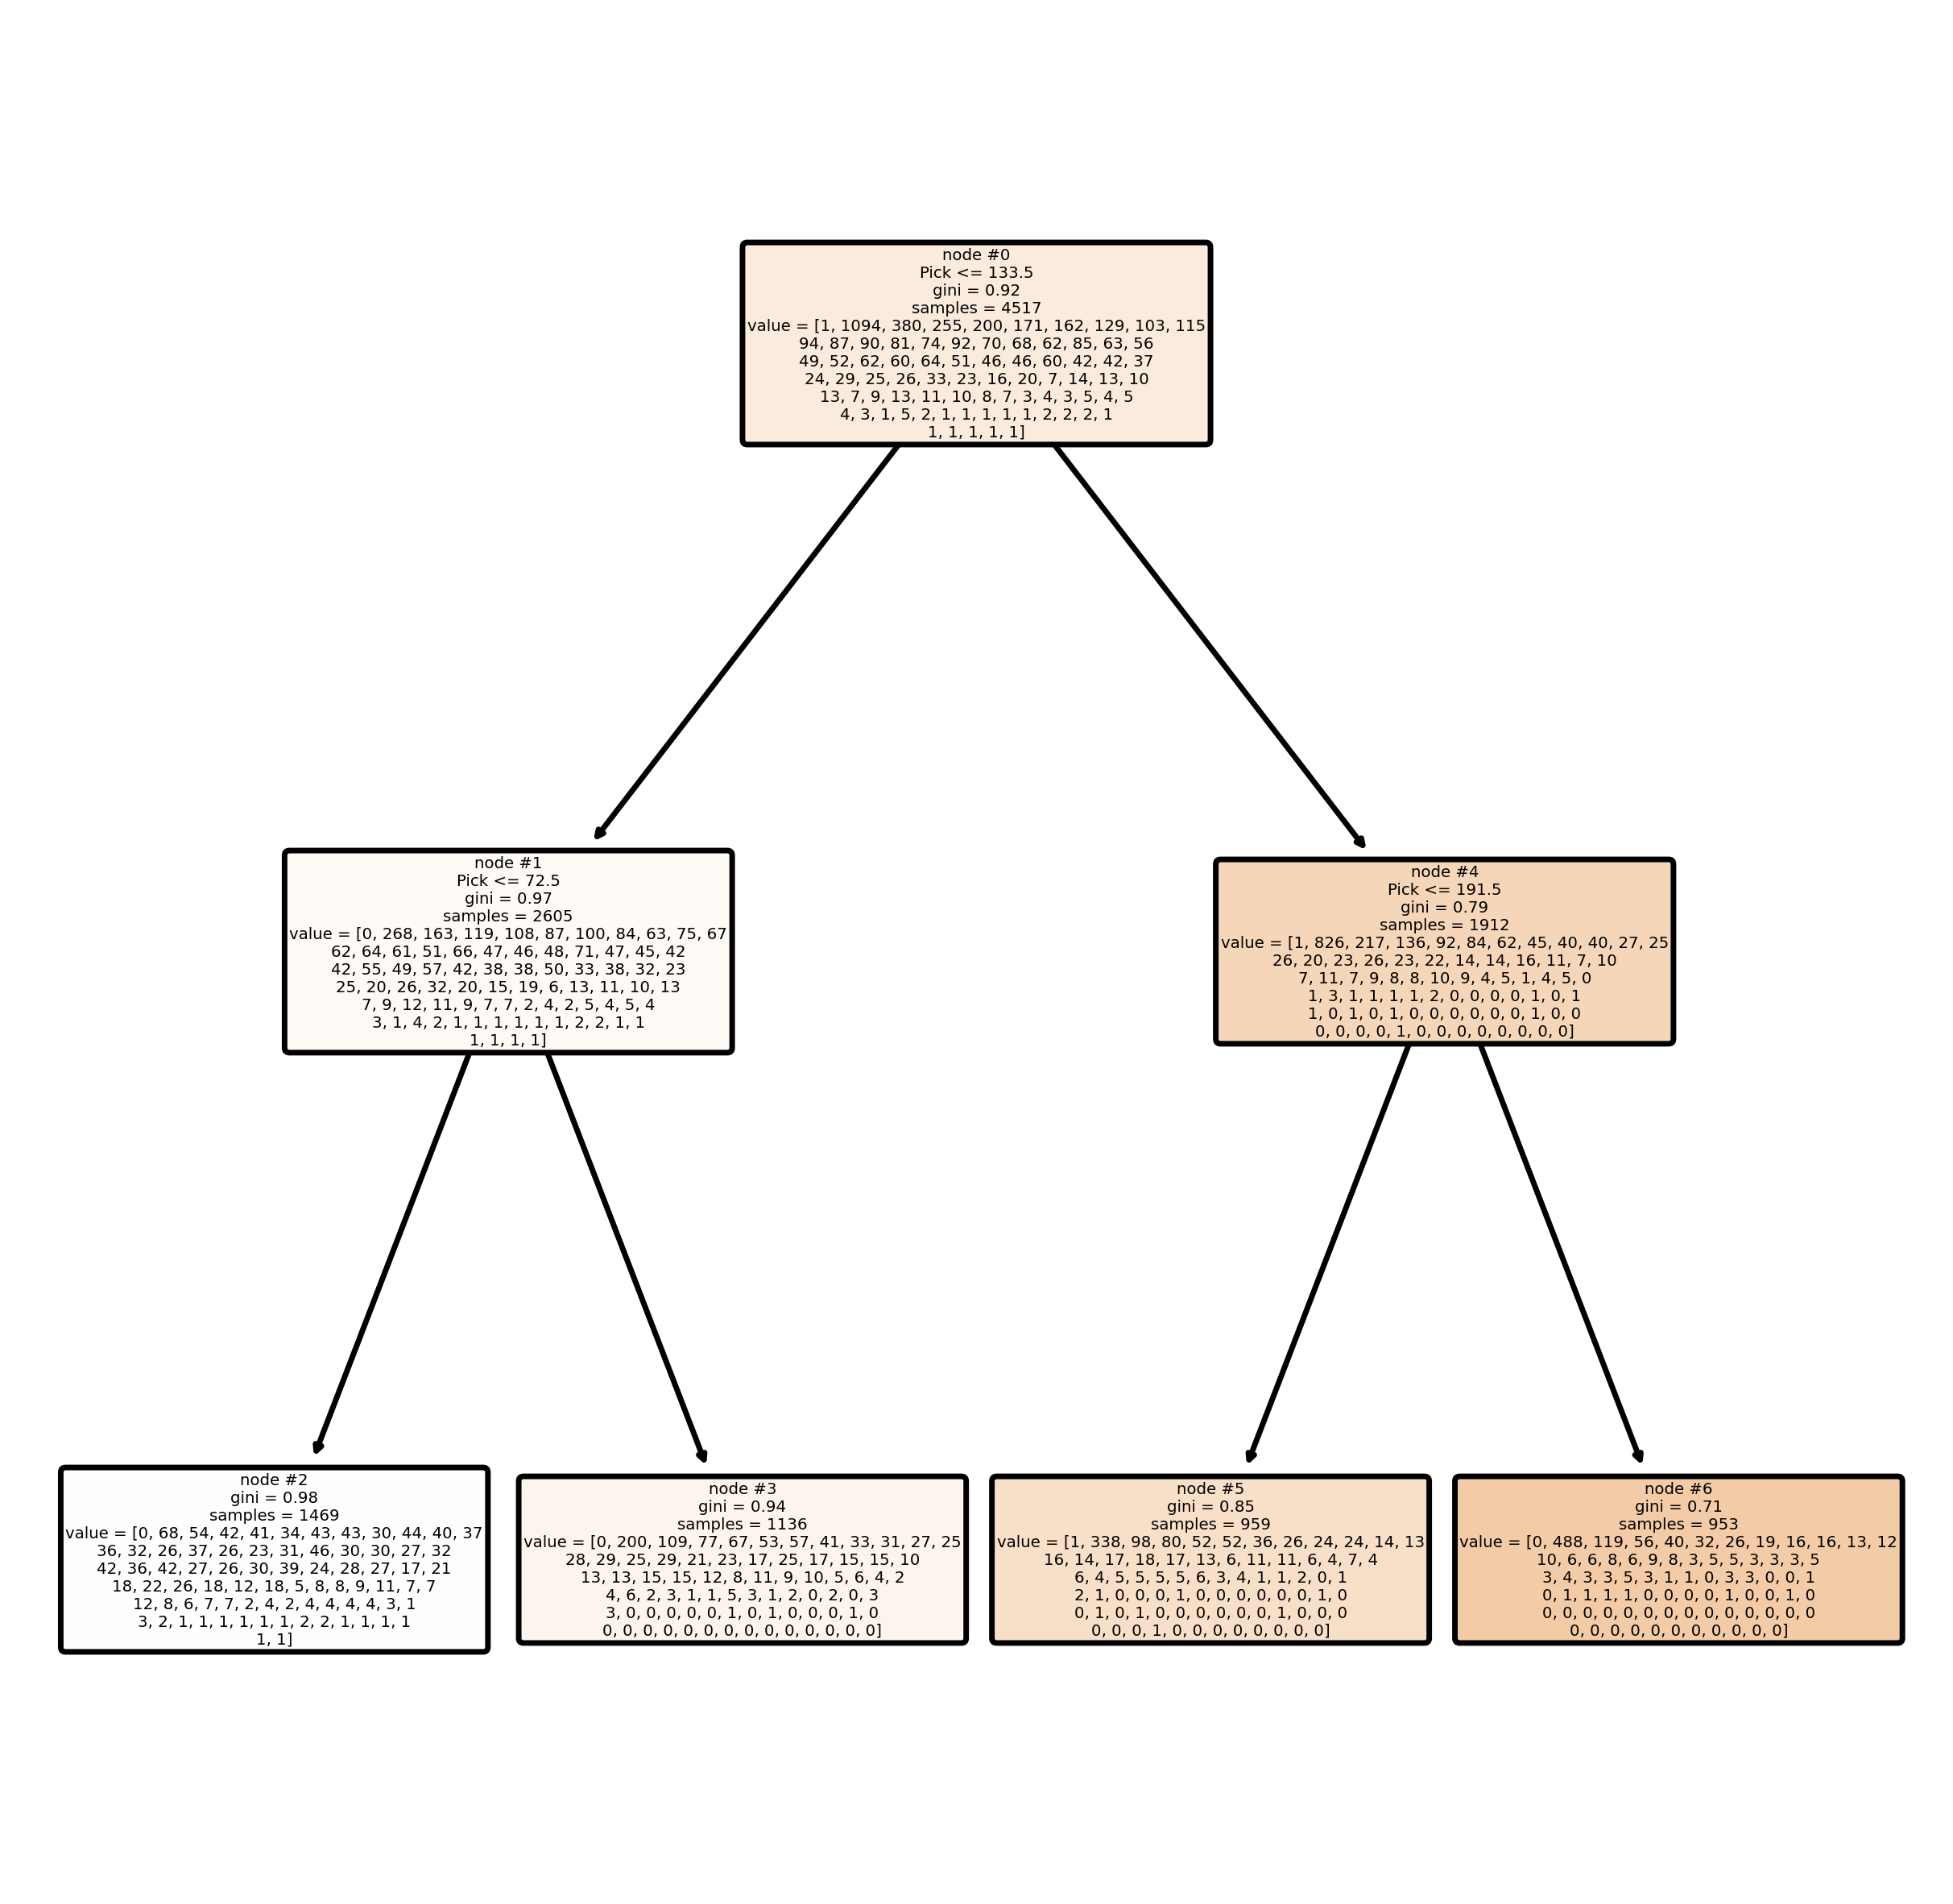

In [433]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=True,
               impurity=True, node_ids=True, rounded=True, precision=2) # plots the tree 